In [3]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D



In [4]:
dataset = pd.read_excel('data.xlsx')
print(dataset.head())

   Sucrose Syrup Content  Carob Syrup Content  Time (hr)  \
0                    1.0                  0.0          0   
1                    1.0                  0.0          3   
2                    1.0                  0.0          6   
3                    1.0                  0.0          9   
4                    1.0                  0.0         12   

   Yeast Concentration (g/L)  Total Soluble Solids (Brix)  \
0                         10                         18.2   
1                         10                         15.7   
2                         10                         12.5   
3                         10                         10.0   
4                         10                          8.5   

   Bioethanol Concentration (g/L)  
0                        0.000000  
1                       12.512288  
2                       27.841882  
3                       39.305652  
4                       45.976450  


In [5]:
dataset.shape


(189, 6)

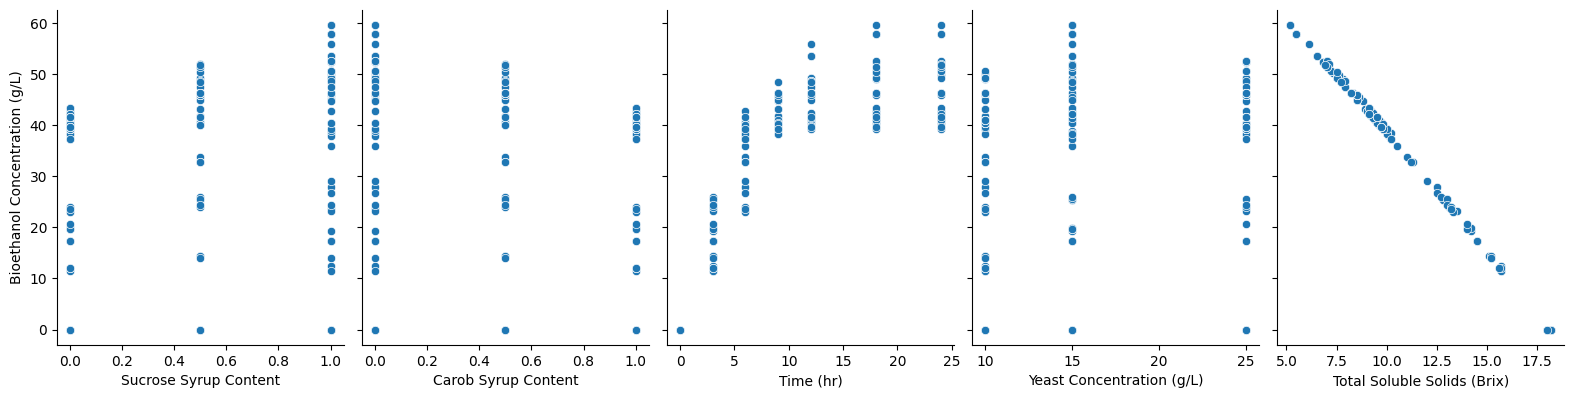

In [6]:
sns.pairplot(dataset, x_vars=["Sucrose Syrup Content","Carob Syrup Content","Time (hr)","Yeast Concentration (g/L)","Total Soluble Solids (Brix)"], y_vars="Bioethanol Concentration (g/L)", height=4, aspect=0.8)
plt.show()

# رسم Heatmap للتأكد من الترابط بين المتغيرات
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [8]:
plt.figure(figsize=(7,5))
plt.scatter(dataset["Time (hr)"], dataset["Total Soluble Solids (Brix)"])
plt.xlabel("Time (hr)")
plt.ylabel("Total Soluble Solids (Brix)")
plt.title("Time vs Brix")
plt.grid(True)
plt.show()


In [14]:
plt.figure(figsize=(7,5))
plt.scatter(dataset["Time (hr)"], dataset["Bioethanol Concentration (g/L)"])
plt.xlabel("Time (hr)")
plt.ylabel("Bioethanol Concentration (g/L)")
plt.title("Time vs Bioethanol")
plt.grid(True)
plt.show()


In [15]:
X = dataset[["Sucrose Syrup Content","Carob Syrup Content","Time (hr)","Yeast Concentration (g/L)","Total Soluble Solids (Brix)"]]
y = dataset["Bioethanol Concentration (g/L)"]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf.predict(X_test)

# دقة النموذج
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 0.25
R2 Score: 1.00


In [20]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2:", cv_scores.mean())


Cross-Validation R2 Scores: [0.99721325 0.99924447 0.99828342 0.99727995 0.9987636 ]
Mean R2: 0.9981569378298587


In [22]:
importance = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(7,4))
plt.barh(feature_names, importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # الخط المثالي
plt.xlabel("Actual Bioethanol Concentration")
plt.ylabel("Predicted Bioethanol Concentration")
plt.title("Random Forest Regression Predictions")
plt.show()



In [25]:
new_data = [[0, 1, 9, 25, 9.80]]
prediction = rf.predict(new_data)
print("Predicted Bioethanol:", prediction[0])


Predicted Bioethanol: 39.620125235885176


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


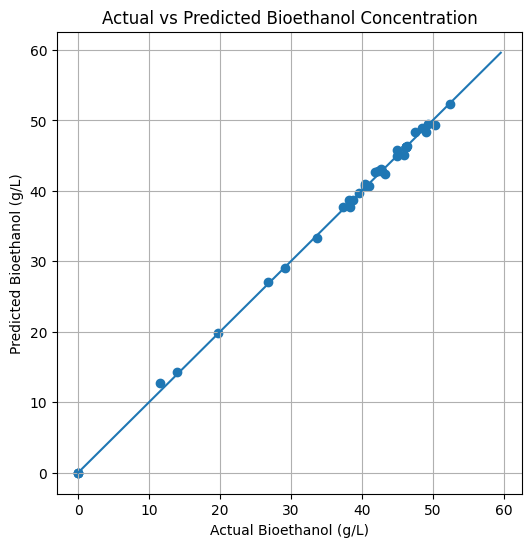

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Actual Bioethanol (g/L)")
plt.ylabel("Predicted Bioethanol (g/L)")
plt.title("Actual vs Predicted Bioethanol Concentration")
plt.grid(True)
plt.show()
